[View in Colaboratory](https://colab.research.google.com/github/rainu1729/data-analysis/blob/master/EDXcourse600_2x.ipynb)

###edx course 600.2x
### knapsack problem , greedy algo

In [0]:
class food(object):
    '''the food class it contains the name of the food followed by  its value and the calories
    there is init function, getters and rewritten __str__ fun'''
    def __init__(self,name,value,cost):
        self.name=name
        self.value=value
        self.calories=cost
    
    def getname(self):
        return self.name
    
    def getvalue(self):
        return self.value

    def getcalories(self):
        return self.calories

    def getcalpervalue(self):
        return self.calories/self.value

    def __str__(self):
        return self.name+' <'+str(self.value)+','+str(self.calories)+'>'

#### build the menu using the food

In [0]:
def themenu(name,value,calorie):
    """the menu is build using the food class and returns a list
    the name,value and calorie are list of same length
    """
    menu =[]
    for i in range(len(name)):
        menu.append(food(name[i],value[i],calorie[i]))
    return menu

### the greedy algo in form of a function

In [0]:
def greedy(items,maxcost,keyfunction):
    """items is a list of menu, maxcost is a positive number
    based on the keyfunction a new list of items is created"""
    itemscopy =  sorted(items,key=keyfunction,reverse=True)
    result = []
    totalvalue,totalcal= 0.0,0.0
    for i in range(len(itemscopy)):
        if(totalcal+itemscopy[i].getcalories()<=maxcost):
            result.append(itemscopy[i])
            totalcal+=itemscopy[i].getcalories()
            totalvalue+=itemscopy[i].getvalue()
    
    return (result,totalvalue,totalcal)

** test the greedy function**

In [0]:
def testGreedy(items,constraint,keyFunction):
    """test function inputs are 
    items i.e the menu in form of a python list
    constraint as the max calorie value 
    the sorting keyfunction i.e any of the item parameter like calories,value,calories per value
    """
    taken,val,cal = greedy(items,constraint,keyFunction)
    print('total value of items taken ',val,' total cal ',cal)
    for item in taken:
        print(' ',item)

def testGreedys(foods,maxUnit):
    """RUN THE testGreedy function with diff keyfunctions and a fixed constraint
    the input is the foods a list containing object of type food.
    max calorie value which should not be exceed
    """
    print('use greedy by value to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getvalue(x))
    print('--------------------------------------------------------')
    print('use greedy by cost(calorie) to allocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:1/food.getcalories(x))
    print('------------------------------------------------------')
    print('use greedy by density to allcocate ',maxUnit,' calories')
    testGreedy(foods,maxUnit,lambda x:food.getcalpervalue(x))

Sample data

In [0]:
name = ['wine','beer','pizza','burger','fries','coke','apple','donut']
value = [89,90,30,50,90,79,90,10]
calories = [123,154,258,354,365,150,95,195]

myfood=themenu(name,value,calories)

### implementing the brute force method to find the best fit

In [0]:
def maxVal(toConsider,avail):
    '''
    returns a tuple with items to take and its value
    inputs:
    toConsider : a list of available items
    avail      : available space
    '''
    if toConsider ==[] or avail ==0:
        ## returns a tuple with 0- value and empty items with the items toConsider is None or available space is zero.
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        ## call the same maxVal function without current item if the current items calories is greater than available space.
        result = maxVal(toConsider[1:],avail)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = maxVal(toConsider[1:],avail-nextItem.getcalories())
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=maxVal(toConsider[1:],avail)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    return result

### CREATING A RANDOM LIST OF FOOD , ITS VALUE AND CALORIE so that  MENU can be created 


In [0]:
def crListMenu(itemcount):
    '''
    returns a list with itemcount no of items as menu
    '''
    import itertools as it
    from random import randint
    string='Abcdefghijklmnopqsrstuvwxyz'
    comps=it.permutations(string, 4)
    food=[]
    value=[]
    calories=[]
    for i in range(itemcount):
        food.append(''.join(next(comps)))
        value.append(randint(5,89))
        calories.append(randint(91,208))
    myfood=themenu(food,value,calories)
    return myfood

####using the dyamic programming create a fast version of maxVal

In [0]:
def fastMaxVal(toConsider,avail,memo={}):
    '''
    toConsider : list of items from menu
    avail      : available space in menu
    mem        : is a dictonary storing key values
    '''
    if (len(toConsider),avail) in memo:
        result = memo[(len(toConsider),avail)]
    elif toConsider == [] or avail ==0:
        result =(0,0,())
    elif toConsider[0].getcalories() > avail:
        result = fastMaxVal(toConsider[1:],avail,memo)
    else:
        ## if the current item calories is below the available limit
        nextItem=toConsider[0]
        ## call the maxVal excluding the current item and reducing the available space
        withVal,withCal,withtoTake = fastMaxVal(toConsider[1:],avail-nextItem.getcalories(),memo)
        withVal +=nextItem.getvalue()
        withCal +=nextItem.getcalories()
        ## considering the possiblity of exluding the current item and having the same available space
        withoutVal,withoutCal,withoutToTake=fastMaxVal(toConsider[1:],avail,memo)
        ## compare which is better in terms of maximizing the value with or without the current item.
        if withVal> withoutVal:
            result =(withVal,withCal,withtoTake+(nextItem,))
        else:
            result =(withoutVal,withoutCal,withoutToTake)
    memo[(len(toConsider),avail)] = result 
    return result

## test max val

In [0]:
def testMaxVal(foods,maxUnits,algo,printItems= True):
    print('Using search tree to alloacate ',maxUnits,' calories')
    val,cal,taken=algo(foods,maxUnits)
    print('total value of items taken ',val,' total cal ',cal)
    if printItems:
        for item in taken:
            print(' ',item)

### creating menu with n items and testing the algos

In [0]:
for numitems in (2,4,8,32,64,128,256,512,1024):
    items = crListMenu(numitems)
    testMaxVal(items,750,fastMaxVal)

Using serach tree to alloacate  750  calories
total value of items taken  80  total cal  237
  Abce <44,111>
  Abcd <36,126>
Using serach tree to alloacate  750  calories
total value of items taken  174  total cal  568
  Abcg <65,164>
  Abcf <22,201>
  Abce <63,97>
  Abcd <24,106>
Using serach tree to alloacate  750  calories
total value of items taken  374  total cal  725
  Abcj <67,138>
  Abci <64,179>
  Abch <87,114>
  Abcg <83,110>
  Abcf <73,184>
Using serach tree to alloacate  750  calories
total value of items taken  502  total cal  745
  Abdh <88,115>
  Abcv <80,99>
  Abcr <82,143>
  Abcj <86,156>
  Abch <81,139>
  Abcg <85,93>


# Graph class

####Node class

In [0]:
class Node(object):
    ''' Node class with single attribute name'''
    def __init__(self,name):
        self.name=name
    
    def getName(self):
        return self.name

    def __str__(self):
        return self.name

####Edge class

In [0]:
class Edge(object):
    ''' edge connects two nodes src and dest are objects of class Node'''
    def __init__(self,src,dest):
        self.src=src
        self.dest=dest
    
    def getSource(self):
        return self.src

    def getDestination(self):
        return self.dest
    
    def __str__(self):
        return self.src.getName() + '->'+ self.dest.getName()

####Directed Graph

In [0]:
class Diagraph(object):
    '''Class directed graph edges is dictonary mapping each node to a list of its children'''

    def __init__(self):
        self.edges={}

    def addNode(self,node):
        # if given node is presnt in the dict edges raise a Duplicate error
        if node in self.edges:
            raise ValueError('Duplicate error')
        # if not present , add the node as key in edges dict with an empty list value.
        else:
            self.edges[node]=[]
    
    def addEdge(self,edge):
        src = edge.getSource()
        dest= edge.getDestination()
        # if src node or dest node not present in the edges dict then raise node not in graph
        if not (src in self.edges and dest in self.edges):
            raise ValueError('Node not in graph')
        #else in the edges dict add a key src with and append dest to the list of value
        self.edges[src].append(dest)

    # checks and returns the value i.e a list of childs against a given node 
    def childrenOf(self,node):
        return self.edges[node]
    
    # checks and returns the node if present in the dict of all the edges
    def hasNode(self,node):
        return node in self.edges
           
    #returns the name of the node if present in the dict edges
    def getNode(self,name):
        for n in self.edges:
            if n.getName()== name:
                return n
        raise NameError(name)
    
    
    # overwriting the __str__ method to print all the edges in graph as src -> dest
    def __str__(self):
        result = ''
        for src in self.edges:
            for dest in self.edges[src]:
                result = result + src.getName() + '->' +dest.getName ()+'\n'
        return result[:-1]

####bidirectional graph class inherits from graph class

In [0]:
class Graph(Diagraph):
    # over writing the addEdge method of Diagraph class, i.e adds edges in both direction
    def addEdge(self,edge):
        Diagraph.addEdge(self,edge)
        rev = Edge(edge.getDestination(),edge.getSource())
        Diagraph.addEdge(self,rev)

####Depth First Search

In [0]:
def printPath(path):
    ''' path is a list'''
    result=''
    for i in range(len(path)):
        result = result +'->'+str(path[i])
    return result

def DFS(graph,start,end,path,shortest,toPrint=True):
    # add the start node to the path list
    path= path+[start]
    
    if toPrint:
        print('current DFS path:',printPath(path))
    # check if start node and end node are same 
    if start ==end:
        return path
    # iterate through all the nodes which are child of the given start point
    for node in graph.childrenOf(start):
        # check if the child node is present in the existing path
        if node not in path:
            if shortest == None or len(path) < len(shortest):
                newPath = DFS(graph,node,end,path,shortest,toPrint)

                if newPath!=None:
                    shortest = newPath
        elif toPrint:
            print('already visited node ',node)
    
    return shortest

####Build a graph

In [0]:
def buildCityGraph(typeOfGraph):
    nodes = []
    nodes.append(Node("ABC")) # nodes[0]
    nodes.append(Node("ACB")) # nodes[1]
    nodes.append(Node("BAC")) # nodes[2]
    nodes.append(Node("BCA")) # nodes[3]
    nodes.append(Node("CAB")) # nodes[4]
    nodes.append(Node("CBA")) # nodes[5]

    gObject = typeOfGraph()
    for n in nodes:
        gObject.addNode(n)

    gObject.addEdge(Edge(nodes[0],nodes[1]))
    gObject.addEdge(Edge(nodes[0],nodes[2]))
    gObject.addEdge(Edge(nodes[1],nodes[4]))
    gObject.addEdge(Edge(nodes[2],nodes[3]))
    gObject.addEdge(Edge(nodes[3],nodes[5]))
    gObject.addEdge(Edge(nodes[4],nodes[5]))
    return gObject

####Extract the shortest path

In [0]:
def shortestPath(graph,start,end):
    # wrapper function requires input as graph,start and end points
    return DFS(graph,start,end,[],None)

def testSP(source,destination):
    # test function requires only the source and destination
    typeOfGraph=Graph
    g=buildCityGraph(typeOfGraph)
    sp=shortestPath(g,g.getNode(source),g.getNode(destination))

    if sp!=None:
        print('shortest path from ',source, ' to ',destination, 'is ',printPath(sp))

    else:
        print('there is no path from ',source,' to ',destination)

In [0]:
print(testSP('BCA','ACB'))

current DFS path: ->BCA
current DFS path: ->BCA->BAC
current DFS path: ->BCA->BAC->ABC
current DFS path: ->BCA->BAC->ABC->ACB
already visited node  BAC
already visited node  BCA
current DFS path: ->BCA->CBA
already visited node  BCA
current DFS path: ->BCA->CBA->CAB
current DFS path: ->BCA->CBA->CAB->ACB
already visited node  CBA
shortest path from  BCA  to  ACB is  ->BCA->CBA->CAB->ACB
None


--------------------
**Plotting data with pyplot**


In [0]:
## computes and returns the saving accured at the end of each year.
## rate is annual, terms is in months and monthly is the every month contribution
def retire(monthly, rate, terms):
    savings =[0]
    base = [0]
    mRate = rate/12
    for i in range(terms):
        base +=[i]
        savings += [savings[-1]*( 1 + mRate)+monthly]
    
    return [m/12 for m in base], savings

Display results

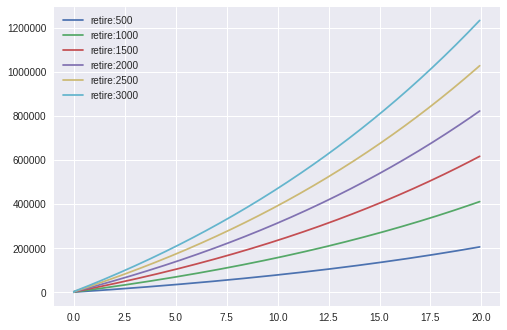

In [14]:

import matplotlib.pyplot as plt
#varying monthly investments
def displayRetireVM(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for monthly in monthlies:
        xvals,yvals = retire(monthly,rate,terms)
        plt.plot(xvals,yvals,label ='retire:'+str(monthly))
        plt.legend(loc ='upper left')
        
displayRetire([500,1000,1500,2000,2500,3000],0.05,20*12)

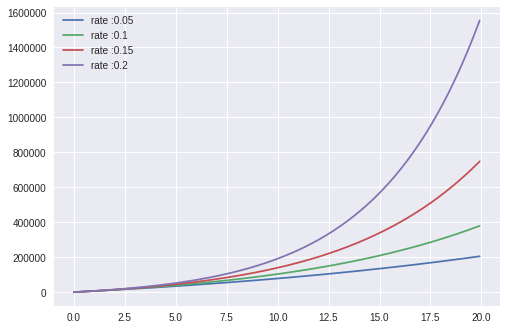

In [16]:
import matplotlib.pyplot as plt
#varying interest rates
def displayRetireVR(monthlies,rate,terms):
    plt.figure('retireMonth')
    plt.clf() #clear previous figures
    for arate in rate:
        xvals,yvals = retire(monthlies,arate,terms)
        plt.plot(xvals,yvals,label ='rate :'+str(arate))
        plt.legend(loc ='upper left')
        
        
displayRetireVR(500,[0.05,0.10,0.15,0.20],20*12)